Team :
krishnateja.k2@gmail.com
amar.r.naik@gmail.com
shankar.uday007@gmail.com
prasad.shripathi@gmail.com

# 1. Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
import sys
import matplotlib.pyplot as plt
import numpy as np
import random
# from torch_receptive_field import PytorchReceptiveField

!pip install torchsummary

# from receptivefield.image import get_default_image
# from torch_receptive_field import receptive_field

# 2. Mount Google Drive to get the files individual files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!rm -rf '/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-ResNet/__pycache__'
!ls -lrt '/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-ResNet/'

total 74
-rw------- 1 root root  2488 Mar  9 11:01 testModel.py
-rw------- 1 root root 42849 Mar  9 11:01 S7.ipynb
-rw------- 1 root root  4771 Mar  9 11:01 dataTorchTransformLoad.py
-rw------- 1 root root  3807 Mar  9 11:01 trainModel.py
-rw------- 1 root root  3734 Mar 10 14:52 Resnet.py
-rw------- 1 root root 16496 Mar 10 16:28 EVA4_S8_CIFAR10.ipynb


## 2.1 Add Googledrive path to the systempath  

In [0]:
sys.path.append('/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-ResNet/')

# 3. Import custom functions and classes

 1. dataTorchTransformLoad
 2. customDeepCNN
 3. trainModel (params for regularization and misclassification plots)
 4. testModel (params for regularization and misclassification plots)


In [0]:
import dataTorchTransformLoad as dtl
import Resnet as resnet
import trainModel
import testModel

In [0]:
# !cat '/content/drive/My Drive/Colab Notebooks/EVA4/S7 - CIFAR10-Structure/testModel.py'

# 4. Train - Test Data Load with torch transforms

In [7]:
train,test,train_loader,test_loader = dtl.data_transform_and_load_function('CIFAR10',64)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


## 4.1 Data Statistics

In [8]:
train_transform = transforms.Compose([transforms.ToTensor()])
train_set = torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=train_transform)
    #print(vars(train_set))
print("Shape : ", train_set.data.shape)
print("Mean : ",train_set.data.mean(axis=(0,1,2))/255)
print("Std : ",train_set.data.std(axis=(0,1,2))/255)
print("Min : ",train_set.data.min(axis=(0,1,2))/255)
print("Max : ",train_set.data.max(axis=(0,1,2))/255)

Files already downloaded and verified
Shape :  (50000, 32, 32, 3)
Mean :  [0.49139968 0.48215841 0.44653091]
Std :  [0.24703223 0.24348513 0.26158784]
Min :  [0. 0. 0.]
Max :  [1. 1. 1.]


## 4.2 Display data

[['plane' 'dog' 'deer' 'deer' 'truck' 'cat' 'truck' 'truck']
 ['cat' 'cat' 'plane' 'horse' 'plane' 'dog' 'dog' 'deer']
 ['car' 'car' 'frog' 'car' 'frog' 'dog' 'ship' 'cat']
 ['car' 'frog' 'deer' 'bird' 'deer' 'bird' 'cat' 'horse']
 ['car' 'cat' 'cat' 'ship' 'horse' 'plane' 'plane' 'plane']
 ['truck' 'plane' 'frog' 'horse' 'ship' 'deer' 'bird' 'plane']
 ['cat' 'dog' 'bird' 'truck' 'dog' 'cat' 'deer' 'dog']
 ['dog' 'frog' 'horse' 'frog' 'ship' 'deer' 'plane' 'truck']]


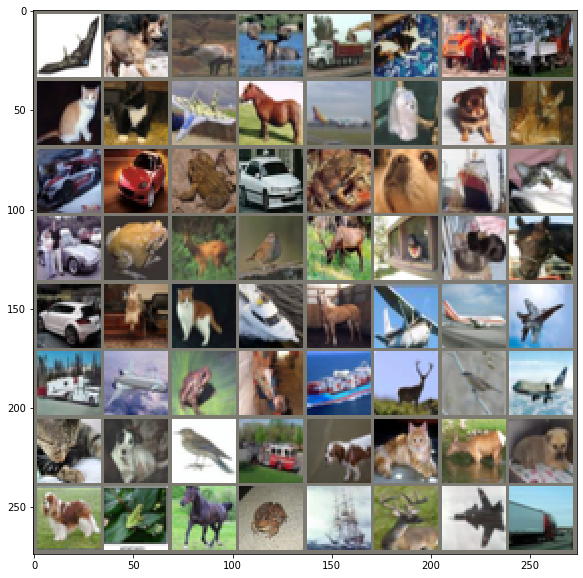

In [9]:
# functions to show an image
def imageshow(img):
    # img = img / 2 + 0.5      #unnormalize
    img[0] = img[0]*0.24703223 + 0.49139968
    img[1] = img[1]*0.24348513 + 0.48215841
    img[2] = img[2]*0.26158784 + 0.44653091
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

random.seed(1)
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
random.seed(1)
imageshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(64)))
print(np.array([classes[labels[j]] for j in range(64)]).reshape(8,8))

# 5. Load Model and print ModelSummary

In [10]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = resnet.ResNet18().to(device)
# model = Net(3).to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-ResNet/Resnet.py:89: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


# 6. Run Models

## 6.1 Normal Run - No Regularization

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-ResNet/Resnet.py:89: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=2.7424190044403076 Batch_id=0 Accuracy=10.94:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-ResNet/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=0.6764661073684692 Batch_id=781 Accuracy=52.81: 100%|██████████| 782/782 [01:52<00:00,  6.34it/s]
/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-ResNet/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clo


Test set: Average loss: 0.9793, Accuracy: 6535/10000 (65.35%)

EPOCH: 1


Loss=0.7681851387023926 Batch_id=781 Accuracy=72.83: 100%|██████████| 782/782 [01:52<00:00,  6.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7417, Accuracy: 7400/10000 (74.00%)

EPOCH: 2


Loss=0.4350843131542206 Batch_id=781 Accuracy=79.81: 100%|██████████| 782/782 [01:52<00:00,  6.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7068, Accuracy: 7581/10000 (75.81%)

EPOCH: 3


Loss=0.2496633529663086 Batch_id=781 Accuracy=83.71: 100%|██████████| 782/782 [01:52<00:00,  6.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5897, Accuracy: 7991/10000 (79.91%)

EPOCH: 4


Loss=0.8020332455635071 Batch_id=781 Accuracy=86.47: 100%|██████████| 782/782 [01:52<00:00,  6.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5572, Accuracy: 8205/10000 (82.05%)

EPOCH: 5


Loss=0.8566444516181946 Batch_id=781 Accuracy=88.47: 100%|██████████| 782/782 [01:52<00:00,  6.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4879, Accuracy: 8365/10000 (83.65%)

EPOCH: 6


Loss=0.22119346261024475 Batch_id=781 Accuracy=90.47: 100%|██████████| 782/782 [01:52<00:00,  6.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4799, Accuracy: 8438/10000 (84.38%)

EPOCH: 7


Loss=0.20888282358646393 Batch_id=781 Accuracy=95.48: 100%|██████████| 782/782 [01:52<00:00,  6.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3737, Accuracy: 8771/10000 (87.71%)

EPOCH: 8


Loss=0.41199788451194763 Batch_id=781 Accuracy=96.72: 100%|██████████| 782/782 [01:52<00:00,  6.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3782, Accuracy: 8793/10000 (87.93%)

EPOCH: 9


Loss=0.22162805497646332 Batch_id=781 Accuracy=97.36: 100%|██████████| 782/782 [01:52<00:00,  6.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3864, Accuracy: 8794/10000 (87.94%)

EPOCH: 10


Loss=0.11002001166343689 Batch_id=781 Accuracy=97.94: 100%|██████████| 782/782 [01:52<00:00,  6.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3963, Accuracy: 8781/10000 (87.81%)

EPOCH: 11


Loss=0.14494985342025757 Batch_id=781 Accuracy=98.35: 100%|██████████| 782/782 [01:52<00:00,  6.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3998, Accuracy: 8816/10000 (88.16%)

EPOCH: 12


Loss=0.012766450643539429 Batch_id=781 Accuracy=98.80: 100%|██████████| 782/782 [01:52<00:00,  6.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4003, Accuracy: 8791/10000 (87.91%)

EPOCH: 13


Loss=0.020331621170043945 Batch_id=781 Accuracy=98.88: 100%|██████████| 782/782 [01:52<00:00,  6.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3985, Accuracy: 8816/10000 (88.16%)

EPOCH: 14


Loss=0.04119214415550232 Batch_id=781 Accuracy=98.87: 100%|██████████| 782/782 [01:52<00:00,  6.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4029, Accuracy: 8808/10000 (88.08%)

EPOCH: 15


Loss=0.07965701818466187 Batch_id=781 Accuracy=98.98: 100%|██████████| 782/782 [01:53<00:00,  6.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4009, Accuracy: 8813/10000 (88.13%)

EPOCH: 16


Loss=0.07205936312675476 Batch_id=781 Accuracy=98.93: 100%|██████████| 782/782 [01:53<00:00,  6.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4015, Accuracy: 8818/10000 (88.18%)

EPOCH: 17


Loss=0.013617157936096191 Batch_id=781 Accuracy=98.90: 100%|██████████| 782/782 [01:53<00:00,  6.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4026, Accuracy: 8817/10000 (88.17%)

EPOCH: 18


Loss=0.01594299077987671 Batch_id=781 Accuracy=98.94: 100%|██████████| 782/782 [01:54<00:00,  6.34it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4021, Accuracy: 8810/10000 (88.10%)

EPOCH: 19


Loss=0.11511218547821045 Batch_id=781 Accuracy=99.01: 100%|██████████| 782/782 [01:54<00:00,  6.34it/s]



Test set: Average loss: 0.4008, Accuracy: 8821/10000 (88.21%)



Text(0.5, 1.0, 'Test Accuracy')

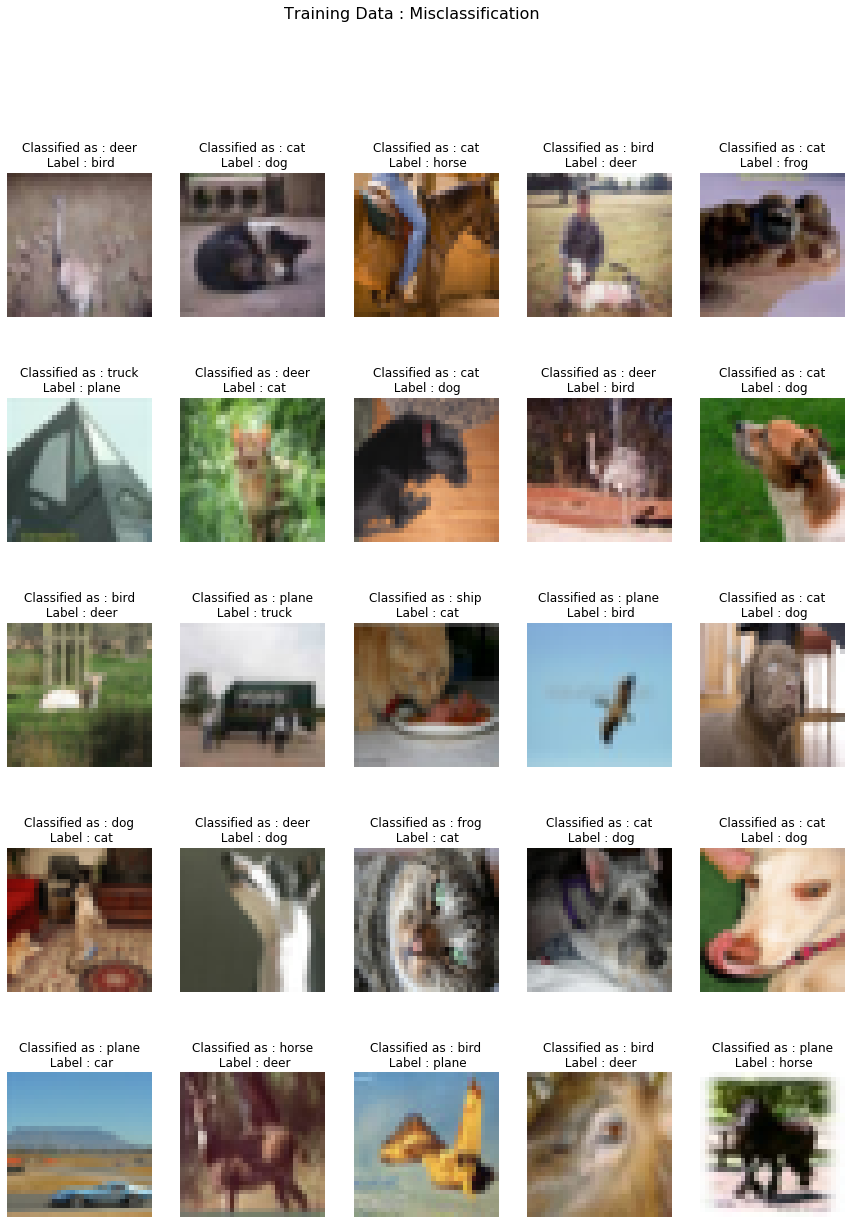

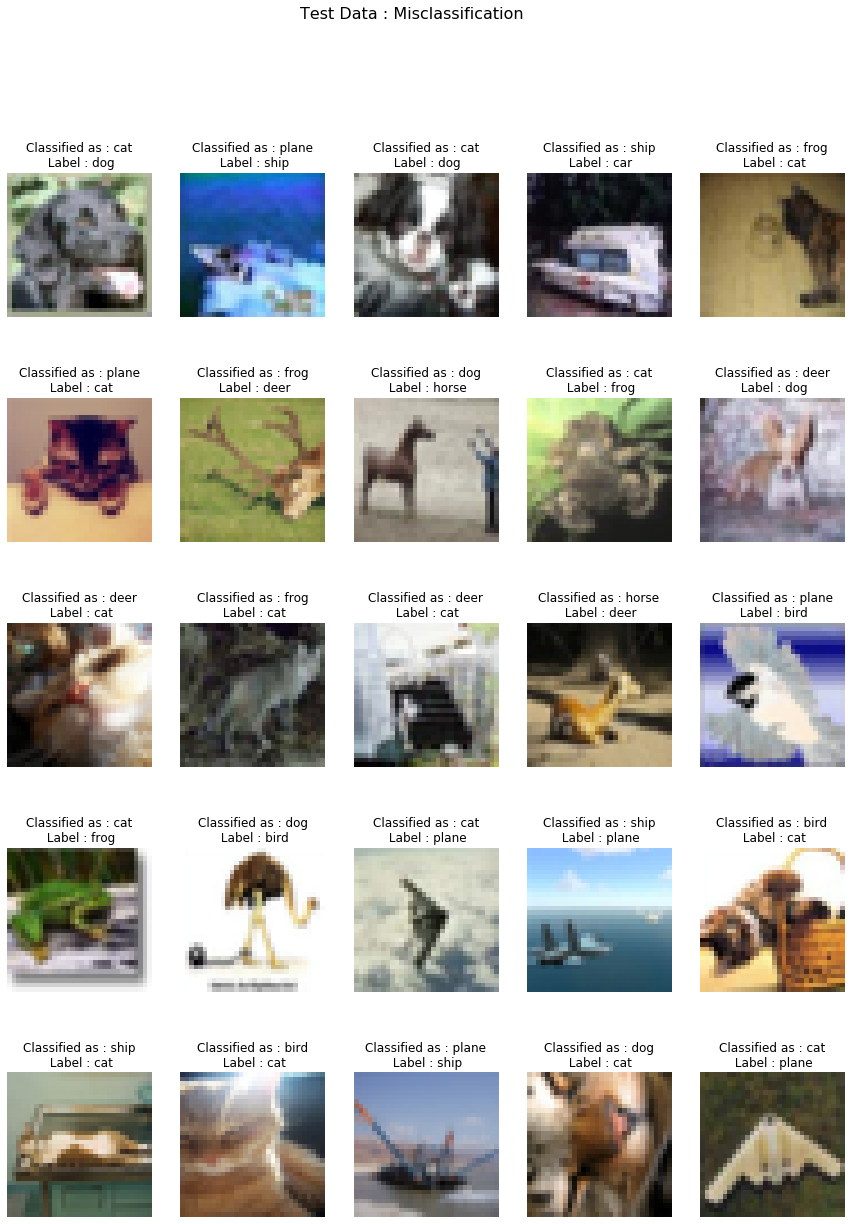

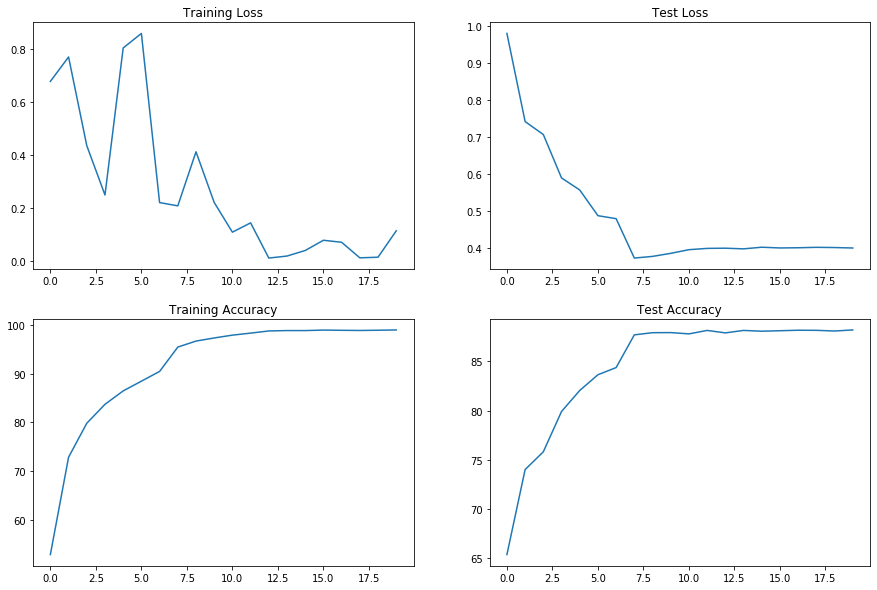

In [11]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
model = resnet.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses = []
train_acc = []
test_losses = []
test_acc = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'Normal', True, EPOCHS-1)
    train_losses.append(tr_losses)
    train_acc.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'Normal',True, EPOCHS-1)
    test_losses.append(ts_loss)
    test_acc.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

## 6.2 Model with - L1 Regularization

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-ResNet/Resnet.py:89: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=57.05290985107422 Batch_id=0 Accuracy=12.50:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-ResNet/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=6.112243175506592 Batch_id=781 Accuracy=39.87: 100%|██████████| 782/782 [02:00<00:00,  5.92it/s]
/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-ResNet/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone


Test set: Average loss: 2.0423, Accuracy: 3050/10000 (30.50%)

EPOCH: 1


Loss=5.155595779418945 Batch_id=781 Accuracy=44.92: 100%|██████████| 782/782 [02:00<00:00,  5.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.4278, Accuracy: 4715/10000 (47.15%)

EPOCH: 2


Loss=5.352632999420166 Batch_id=781 Accuracy=51.11: 100%|██████████| 782/782 [02:00<00:00,  5.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6701, Accuracy: 3896/10000 (38.96%)

EPOCH: 3


Loss=5.1374359130859375 Batch_id=781 Accuracy=55.23: 100%|██████████| 782/782 [02:00<00:00,  5.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2291, Accuracy: 5612/10000 (56.12%)

EPOCH: 4


Loss=4.131781101226807 Batch_id=781 Accuracy=58.98: 100%|██████████| 782/782 [02:00<00:00,  5.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.4395, Accuracy: 5016/10000 (50.16%)

EPOCH: 5


Loss=4.058119297027588 Batch_id=781 Accuracy=61.62: 100%|██████████| 782/782 [02:00<00:00,  5.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1092, Accuracy: 6020/10000 (60.20%)

EPOCH: 6


Loss=3.9516918659210205 Batch_id=781 Accuracy=64.21: 100%|██████████| 782/782 [02:00<00:00,  5.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.5308, Accuracy: 5064/10000 (50.64%)

EPOCH: 7


Loss=3.0847954750061035 Batch_id=781 Accuracy=72.62: 100%|██████████| 782/782 [02:00<00:00,  5.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7557, Accuracy: 7330/10000 (73.30%)

EPOCH: 8


Loss=3.3288941383361816 Batch_id=781 Accuracy=74.02: 100%|██████████| 782/782 [02:00<00:00,  5.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7545, Accuracy: 7367/10000 (73.67%)

EPOCH: 9


Loss=3.1609647274017334 Batch_id=781 Accuracy=75.23: 100%|██████████| 782/782 [02:00<00:00,  5.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7252, Accuracy: 7479/10000 (74.79%)

EPOCH: 10


Loss=3.0267019271850586 Batch_id=781 Accuracy=75.82: 100%|██████████| 782/782 [02:00<00:00,  5.91it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7923, Accuracy: 7232/10000 (72.32%)

EPOCH: 11


Loss=3.327066421508789 Batch_id=781 Accuracy=76.43: 100%|██████████| 782/782 [02:00<00:00,  5.91it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7271, Accuracy: 7478/10000 (74.78%)

EPOCH: 12


Loss=2.8077874183654785 Batch_id=781 Accuracy=79.85: 100%|██████████| 782/782 [02:00<00:00,  5.91it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6059, Accuracy: 7902/10000 (79.02%)

EPOCH: 13


Loss=2.178968667984009 Batch_id=781 Accuracy=80.60: 100%|██████████| 782/782 [02:00<00:00,  5.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5838, Accuracy: 7938/10000 (79.38%)

EPOCH: 14


Loss=3.442739963531494 Batch_id=781 Accuracy=81.03: 100%|██████████| 782/782 [02:00<00:00,  5.93it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5817, Accuracy: 7987/10000 (79.87%)

EPOCH: 15


Loss=2.9115259647369385 Batch_id=781 Accuracy=81.82: 100%|██████████| 782/782 [02:00<00:00,  5.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5662, Accuracy: 8029/10000 (80.29%)

EPOCH: 16


Loss=2.502586841583252 Batch_id=781 Accuracy=81.81: 100%|██████████| 782/782 [02:00<00:00,  5.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5648, Accuracy: 8044/10000 (80.44%)

EPOCH: 17


Loss=2.1557235717773438 Batch_id=781 Accuracy=81.94: 100%|██████████| 782/782 [02:00<00:00,  5.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5645, Accuracy: 8029/10000 (80.29%)

EPOCH: 18


Loss=2.3908374309539795 Batch_id=781 Accuracy=82.25: 100%|██████████| 782/782 [02:00<00:00,  5.95it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5606, Accuracy: 8063/10000 (80.63%)

EPOCH: 19


Loss=2.5558125972747803 Batch_id=781 Accuracy=81.97: 100%|██████████| 782/782 [02:01<00:00,  5.95it/s]



Test set: Average loss: 0.5627, Accuracy: 8062/10000 (80.62%)



Text(0.5, 1.0, 'Test Accuracy')

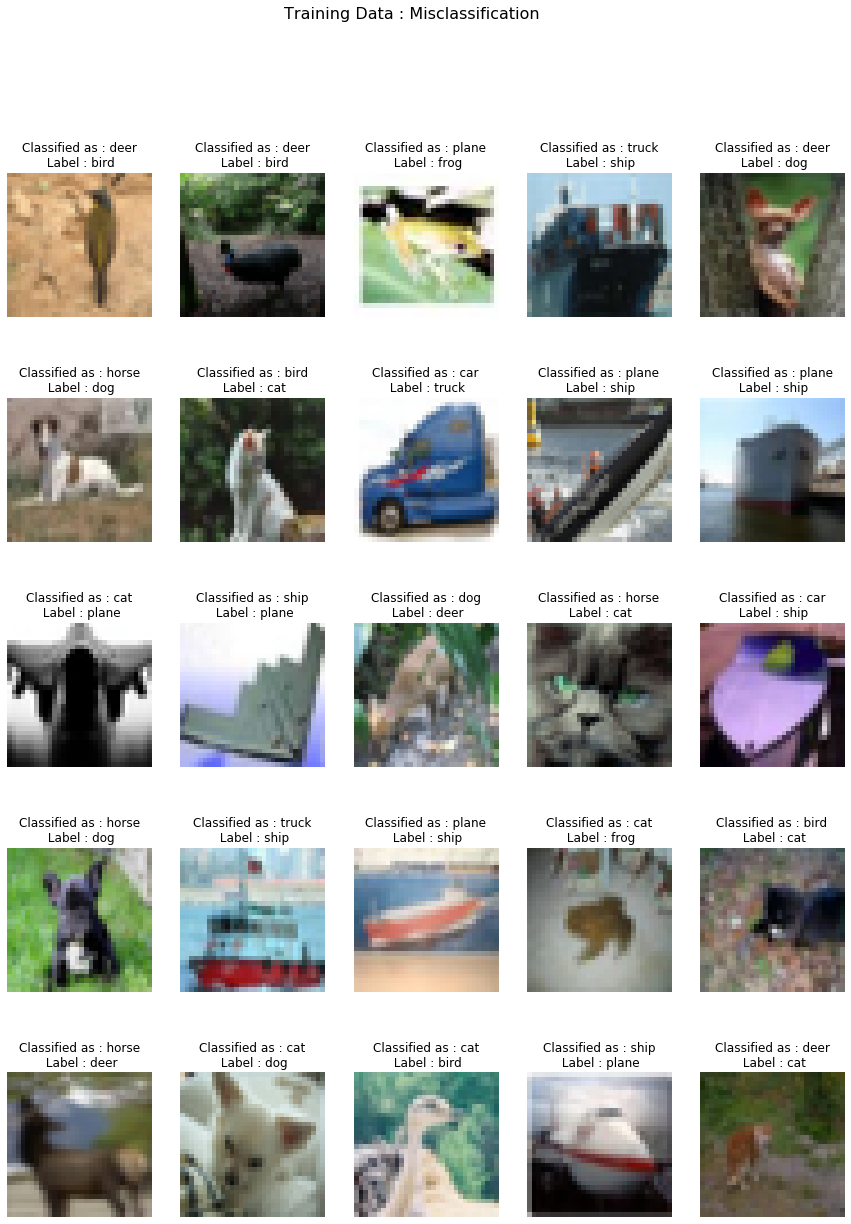

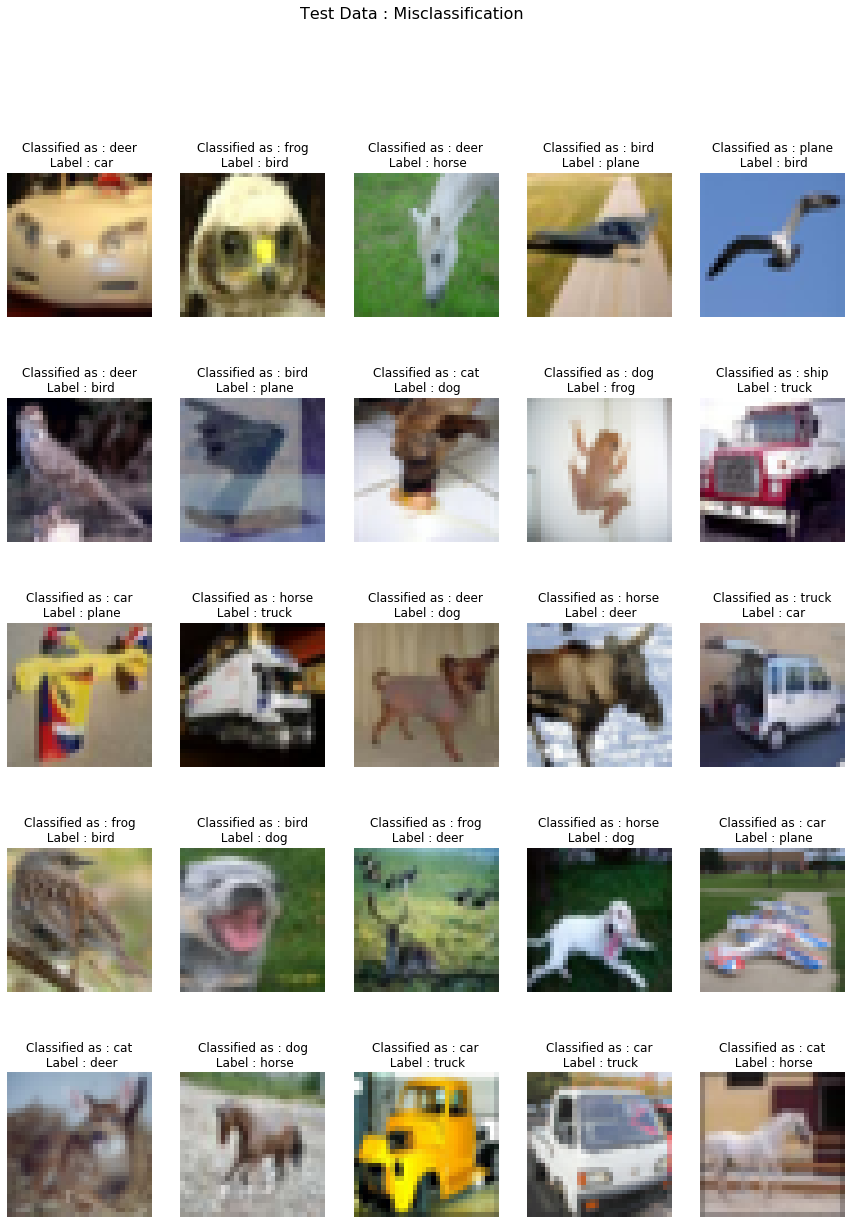

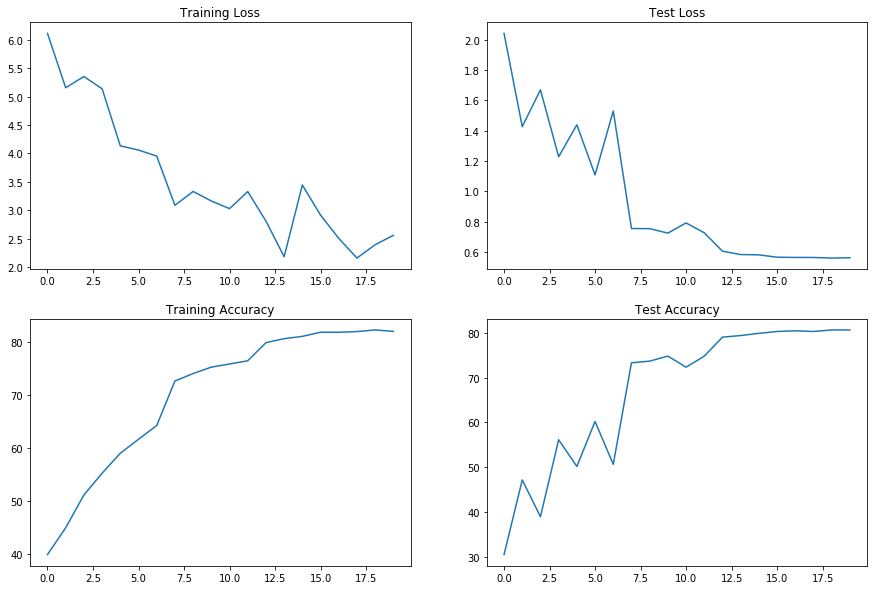

In [17]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
model = resnet.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses_L1 = []
train_acc_L1 = []
test_losses_L1 = []
test_acc_L1 = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'L1', True, EPOCHS-1)
    train_losses_L1.append(tr_losses)
    train_acc_L1.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'L1',True, EPOCHS-1)
    test_losses_L1.append(ts_loss)
    test_acc_L1.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses_L1)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_L1)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_L1)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_L1)
axs[1, 1].set_title("Test Accuracy")

## 6.3 Model with - L2 Regularization

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-ResNet/Resnet.py:89: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=2.4709038734436035 Batch_id=0 Accuracy=4.69:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-ResNet/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=0.7195061445236206 Batch_id=781 Accuracy=53.39: 100%|██████████| 782/782 [01:54<00:00,  6.41it/s]
/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-ResNet/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clon


Test set: Average loss: 1.2518, Accuracy: 5947/10000 (59.47%)

EPOCH: 1


Loss=0.49909308552742004 Batch_id=781 Accuracy=73.45: 100%|██████████| 782/782 [01:54<00:00,  6.34it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7319, Accuracy: 7439/10000 (74.39%)

EPOCH: 2


Loss=1.0299317836761475 Batch_id=781 Accuracy=79.61: 100%|██████████| 782/782 [01:54<00:00,  6.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6773, Accuracy: 7714/10000 (77.14%)

EPOCH: 3


Loss=0.28296345472335815 Batch_id=781 Accuracy=83.30: 100%|██████████| 782/782 [01:54<00:00,  6.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6345, Accuracy: 7784/10000 (77.84%)

EPOCH: 4


Loss=0.32117992639541626 Batch_id=781 Accuracy=85.83: 100%|██████████| 782/782 [01:54<00:00,  6.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7153, Accuracy: 7697/10000 (76.97%)

EPOCH: 5


Loss=0.9228017330169678 Batch_id=781 Accuracy=87.21: 100%|██████████| 782/782 [01:54<00:00,  6.34it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6116, Accuracy: 7976/10000 (79.76%)

EPOCH: 6


Loss=0.5504566431045532 Batch_id=781 Accuracy=88.85: 100%|██████████| 782/782 [01:53<00:00,  6.34it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5854, Accuracy: 8032/10000 (80.32%)

EPOCH: 7


Loss=0.27301979064941406 Batch_id=781 Accuracy=94.22: 100%|██████████| 782/782 [01:53<00:00,  6.39it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3429, Accuracy: 8835/10000 (88.35%)

EPOCH: 8


Loss=0.10065799951553345 Batch_id=781 Accuracy=95.86: 100%|██████████| 782/782 [01:53<00:00,  6.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3372, Accuracy: 8865/10000 (88.65%)

EPOCH: 9


Loss=0.01597699522972107 Batch_id=781 Accuracy=96.65: 100%|██████████| 782/782 [01:53<00:00,  6.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3345, Accuracy: 8893/10000 (88.93%)

EPOCH: 10


Loss=0.04914781451225281 Batch_id=781 Accuracy=97.41: 100%|██████████| 782/782 [01:53<00:00,  6.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3443, Accuracy: 8875/10000 (88.75%)

EPOCH: 11


Loss=0.24935609102249146 Batch_id=781 Accuracy=97.93: 100%|██████████| 782/782 [01:53<00:00,  6.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3434, Accuracy: 8880/10000 (88.80%)

EPOCH: 12


Loss=0.02880871295928955 Batch_id=781 Accuracy=98.62: 100%|██████████| 782/782 [01:52<00:00,  6.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3395, Accuracy: 8878/10000 (88.78%)

EPOCH: 13


Loss=0.255980521440506 Batch_id=781 Accuracy=98.70: 100%|██████████| 782/782 [01:52<00:00,  6.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3414, Accuracy: 8895/10000 (88.95%)

EPOCH: 14


Loss=0.18625755608081818 Batch_id=781 Accuracy=98.80: 100%|██████████| 782/782 [01:52<00:00,  6.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3402, Accuracy: 8883/10000 (88.83%)

EPOCH: 15


Loss=0.10103395581245422 Batch_id=781 Accuracy=98.81: 100%|██████████| 782/782 [01:53<00:00,  6.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3425, Accuracy: 8888/10000 (88.88%)

EPOCH: 16


Loss=0.4005727171897888 Batch_id=781 Accuracy=98.74: 100%|██████████| 782/782 [01:52<00:00,  6.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3427, Accuracy: 8885/10000 (88.85%)

EPOCH: 17


Loss=0.0386807918548584 Batch_id=781 Accuracy=98.80: 100%|██████████| 782/782 [01:53<00:00,  6.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3425, Accuracy: 8873/10000 (88.73%)

EPOCH: 18


Loss=0.05854344367980957 Batch_id=781 Accuracy=98.80: 100%|██████████| 782/782 [01:52<00:00,  6.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3424, Accuracy: 8884/10000 (88.84%)

EPOCH: 19


Loss=0.010694175958633423 Batch_id=781 Accuracy=98.80: 100%|██████████| 782/782 [01:53<00:00,  6.31it/s]



Test set: Average loss: 0.3418, Accuracy: 8881/10000 (88.81%)



Text(0.5, 1.0, 'Test Accuracy')

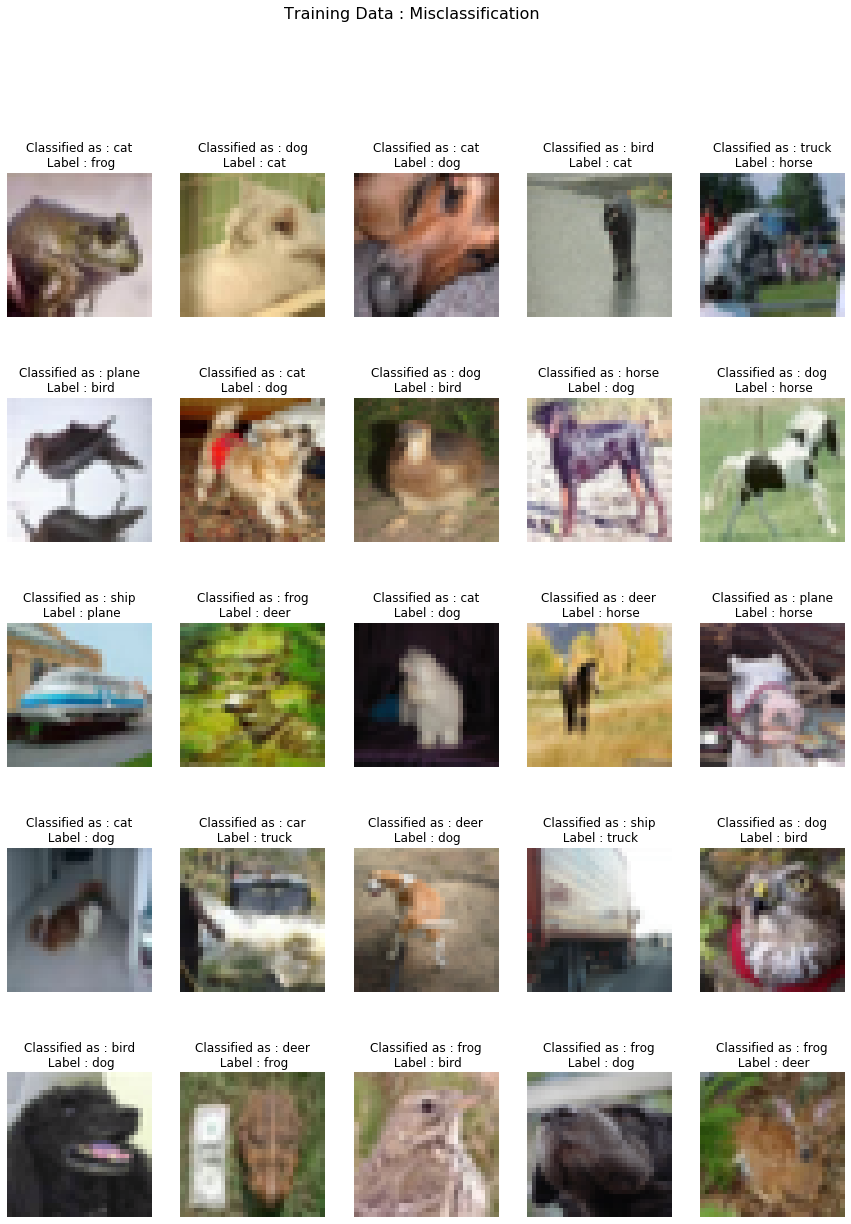

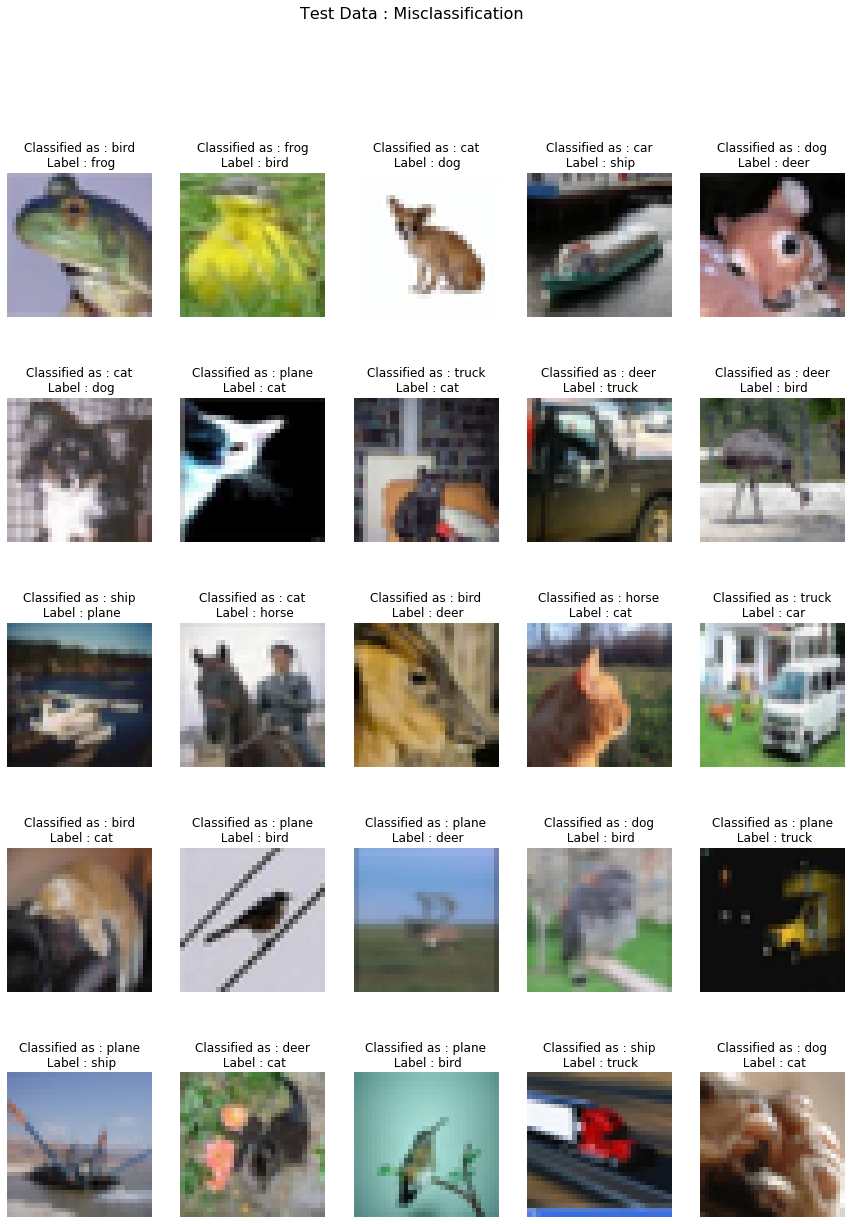

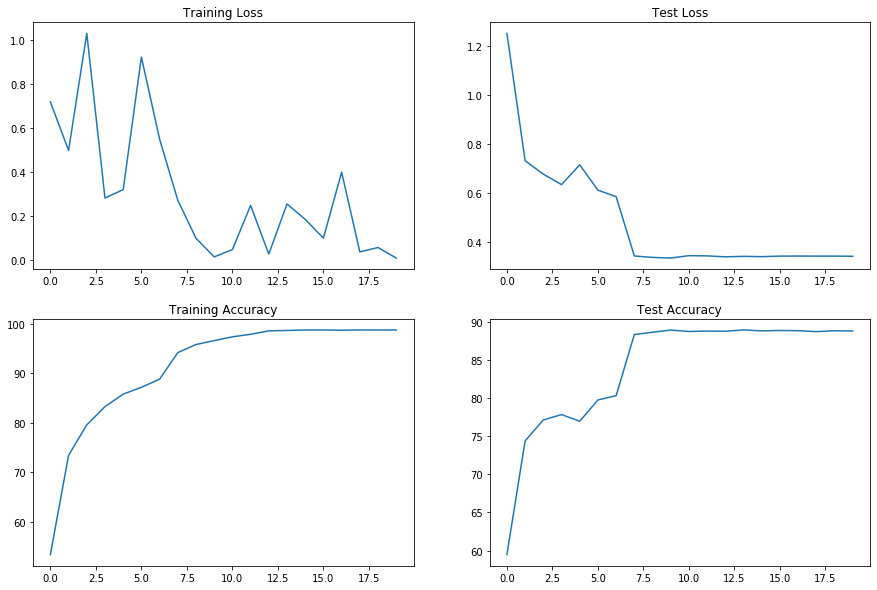

In [13]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
model = resnet.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay = 0.001)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses_L2 = []
train_acc_L2 = []
test_losses_L2 = []
test_acc_L2 = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'L2', True, EPOCHS-1)
    train_losses_L2.append(tr_losses)
    train_acc_L2.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'L2',True, EPOCHS-1)
    test_losses_L2.append(ts_loss)
    test_acc_L2.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses_L2)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_L2)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_L2)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_L2)
axs[1, 1].set_title("Test Accuracy")

## 6.4 Model with - L1 & L2 Regularization

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-ResNet/Resnet.py:89: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=57.14134979248047 Batch_id=0 Accuracy=9.38:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-ResNet/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=5.537839412689209 Batch_id=781 Accuracy=40.62: 100%|██████████| 782/782 [02:03<00:00,  5.85it/s]
/content/drive/My Drive/Colab Notebooks/EVA4/S8 - CIFAR10-ResNet/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone(


Test set: Average loss: 1.8478, Accuracy: 2932/10000 (29.32%)

EPOCH: 1


Loss=5.124357223510742 Batch_id=781 Accuracy=46.33: 100%|██████████| 782/782 [02:03<00:00,  5.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6593, Accuracy: 4516/10000 (45.16%)

EPOCH: 2


Loss=4.631709098815918 Batch_id=781 Accuracy=52.50: 100%|██████████| 782/782 [02:03<00:00,  5.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.7333, Accuracy: 3920/10000 (39.20%)

EPOCH: 3


Loss=3.7828330993652344 Batch_id=781 Accuracy=56.58: 100%|██████████| 782/782 [02:03<00:00,  5.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.7918, Accuracy: 3981/10000 (39.81%)

EPOCH: 4


Loss=3.7410218715667725 Batch_id=781 Accuracy=58.82: 100%|██████████| 782/782 [02:03<00:00,  5.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 2.4616, Accuracy: 3436/10000 (34.36%)

EPOCH: 5


Loss=3.129859447479248 Batch_id=781 Accuracy=61.52: 100%|██████████| 782/782 [02:03<00:00,  5.95it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2097, Accuracy: 5606/10000 (56.06%)

EPOCH: 6


Loss=3.4462666511535645 Batch_id=781 Accuracy=63.52: 100%|██████████| 782/782 [02:03<00:00,  5.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1766, Accuracy: 5904/10000 (59.04%)

EPOCH: 7


Loss=2.0895071029663086 Batch_id=781 Accuracy=71.47: 100%|██████████| 782/782 [02:03<00:00,  5.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7713, Accuracy: 7276/10000 (72.76%)

EPOCH: 8


Loss=2.343693733215332 Batch_id=781 Accuracy=73.25: 100%|██████████| 782/782 [02:03<00:00,  5.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8205, Accuracy: 7149/10000 (71.49%)

EPOCH: 9


Loss=1.8276268243789673 Batch_id=781 Accuracy=74.70: 100%|██████████| 782/782 [02:03<00:00,  5.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7274, Accuracy: 7421/10000 (74.21%)

EPOCH: 10


Loss=1.7260632514953613 Batch_id=781 Accuracy=74.95: 100%|██████████| 782/782 [02:03<00:00,  5.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8300, Accuracy: 7129/10000 (71.29%)

EPOCH: 11


Loss=1.5571479797363281 Batch_id=781 Accuracy=75.93: 100%|██████████| 782/782 [02:03<00:00,  5.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8593, Accuracy: 7017/10000 (70.17%)

EPOCH: 12


Loss=1.7179369926452637 Batch_id=781 Accuracy=79.68: 100%|██████████| 782/782 [02:03<00:00,  5.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5992, Accuracy: 7894/10000 (78.94%)

EPOCH: 13


Loss=1.6578218936920166 Batch_id=781 Accuracy=80.39: 100%|██████████| 782/782 [02:03<00:00,  5.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5866, Accuracy: 7982/10000 (79.82%)

EPOCH: 14


Loss=1.5704774856567383 Batch_id=781 Accuracy=80.88: 100%|██████████| 782/782 [02:03<00:00,  5.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5819, Accuracy: 7988/10000 (79.88%)

EPOCH: 15


Loss=2.058236837387085 Batch_id=781 Accuracy=81.40: 100%|██████████| 782/782 [02:03<00:00,  5.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5721, Accuracy: 8018/10000 (80.18%)

EPOCH: 16


Loss=1.5127564668655396 Batch_id=781 Accuracy=81.72: 100%|██████████| 782/782 [02:03<00:00,  5.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5711, Accuracy: 8029/10000 (80.29%)

EPOCH: 17


Loss=1.8428229093551636 Batch_id=781 Accuracy=81.75: 100%|██████████| 782/782 [02:03<00:00,  5.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5730, Accuracy: 8027/10000 (80.27%)

EPOCH: 18


Loss=2.3825511932373047 Batch_id=781 Accuracy=81.86: 100%|██████████| 782/782 [02:03<00:00,  5.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5680, Accuracy: 8060/10000 (80.60%)

EPOCH: 19


Loss=1.4962846040725708 Batch_id=781 Accuracy=81.94: 100%|██████████| 782/782 [02:03<00:00,  5.94it/s]



Test set: Average loss: 0.5715, Accuracy: 8041/10000 (80.41%)



Text(0.5, 1.0, 'Test Accuracy')

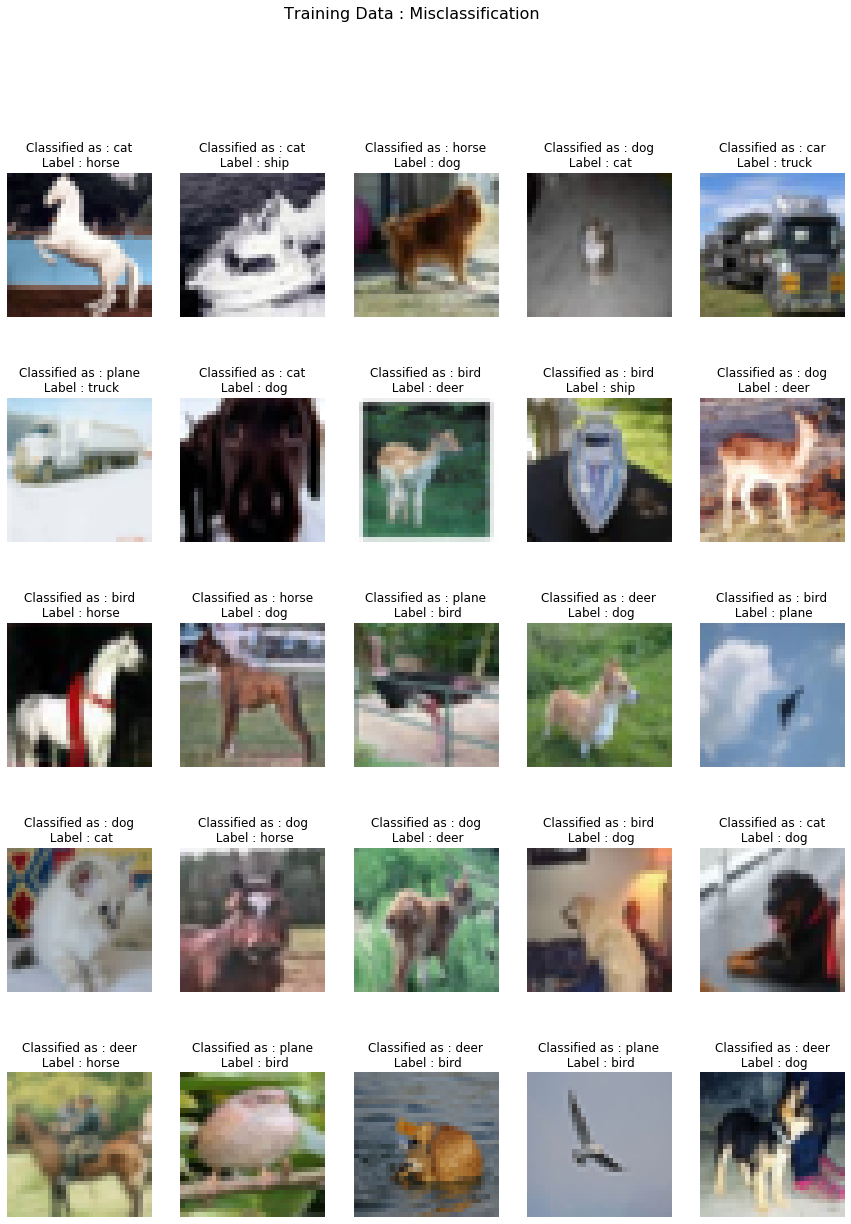

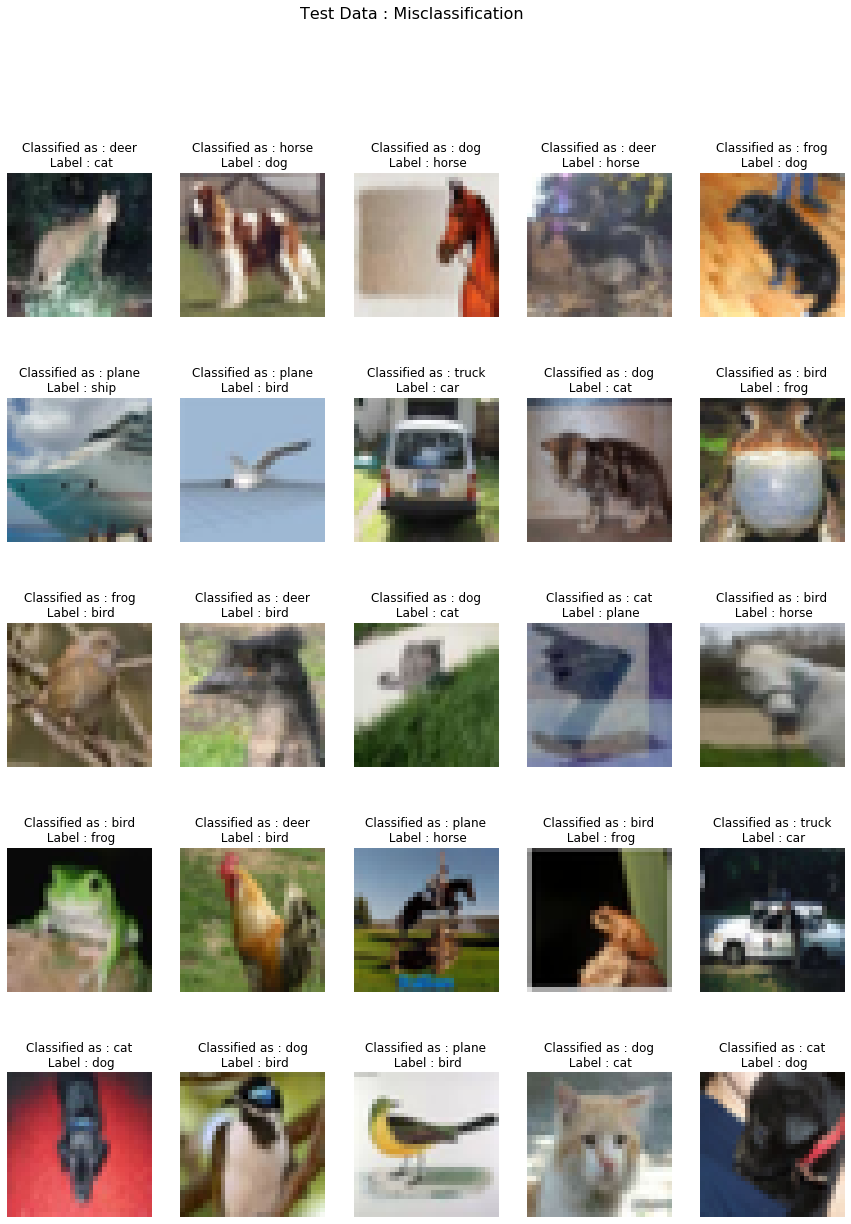

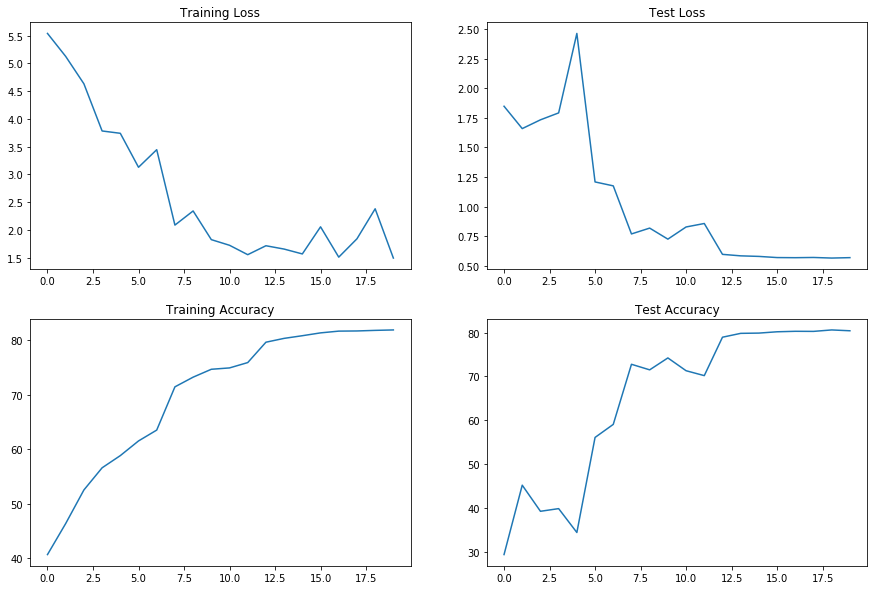

In [14]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
model = resnet.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay = 0.001)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses_L1_L2 = []
train_acc_L1_L2 = []
test_losses_L1_L2 = []
test_acc_L1_L2 = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'ElastiNet', True, EPOCHS-1)
    train_losses_L1_L2.append(tr_losses)
    train_acc_L1_L2.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'ElastiNet',True, EPOCHS-1)
    test_losses_L1_L2.append(ts_loss)
    test_acc_L1_L2.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses_L1_L2)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_L1_L2)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_L1_L2)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_L1_L2)
axs[1, 1].set_title("Test Accuracy")

# 7. Display ReceptiveField calculations

In [15]:
# https://gist.github.com/Nikasa1889/781a8eb20c5b32f8e378353cde4daa51#file-computereceptivefield-py
import math
import sys
# final_model - high RF
convnet =   [[3,1,0],[3,1,4],[1,1,4],[2,2,0],[1,1,0],[5,1,2],[5,1,2],[5,1,2],[2,2,0],
             [1,1,0], [5, 1, 2],[5,1,2],[9,9,0],[1,1,0]]
layer_names = ['conv1','conv2','conv3','MP1','conv4','conv5','conv6','conv7','MP2', 
               'conv8','conv9','conv10','GAP','conv11']
# other_model - low RF
# convnet =   [[3,1,0],[3,1,4],[1,1,4],[2,2,0],[1,1,0],[5,1,2],[5,1,2],[5,1,2],#[2,2,0],
#              [1,1,0], [3, 1, 0],[3,1,0],[7,7,0],[1,1,0]]
# layer_names = ['conv1','conv2','conv3','MP1','conv4','conv5','conv6','conv7',#'MP2', 
#                'conv8','conv9','conv10','GAP','conv11']               
imsize = 32

def outFromIn(conv, layerIn):
  n_in = layerIn[0]
  j_in = layerIn[1]
  r_in = layerIn[2]
  start_in = layerIn[3]
  k = conv[0]
  s = conv[1]
  p = conv[2]
  
  n_out = math.floor((n_in - k + 2*p)/s) + 1
  actualP = (n_out-1)*s - n_in + k 
  pR = math.ceil(actualP/2)
  pL = math.floor(actualP/2)
  
  j_out = j_in * s
  r_out = r_in + (k - 1)*j_in
  start_out = start_in + ((k-1)/2 - pL)*j_in
  return n_out, j_out, r_out, start_out
  
def printLayer(layer, layer_name):
  print(layer_name + ":")
  print("\t n features: %s \n \t jump: %s \n \t receptive size: %s \n \t start: %s " % (layer[0], layer[1], layer[2], layer[3]))
 
layerInfos = []
if __name__ == '__main__':
#first layer is the data layer (image) with n_0 = image size; j_0 = 1; r_0 = 1; and start_0 = 0.5
  print ("-------Net summary------")
  currentLayer = [imsize, 1, 1, 0.5]
  printLayer(currentLayer, "input image")
  for i in range(len(convnet)):
    currentLayer = outFromIn(convnet[i], currentLayer)
    layerInfos.append(currentLayer)
    printLayer(currentLayer, layer_names[i])
  print ("------------------------")
  # layer_name = input ("Layer name where the feature in: ")
  # layer_idx = layer_names.index(layer_name)
  # idx_x = int(input("index of the feature in x dimension (from 0)"))
  # idx_y = int(input("index of the feature in y dimension (from 0)"))
  
  # n = layerInfos[layer_idx][0]
  # j = layerInfos[layer_idx][1]
  # r = layerInfos[layer_idx][2]
  # start = layerInfos[layer_idx][3]
  # assert(idx_x < n)
  # assert(idx_y < n)
  
  # print ("receptive field: (%s, %s)" % (r, r))
  # print ("center: (%s, %s)" % (start+idx_x*j, start+idx_y*j))

-------Net summary------
input image:
	 n features: 32 
 	 jump: 1 
 	 receptive size: 1 
 	 start: 0.5 
conv1:
	 n features: 30 
 	 jump: 1 
 	 receptive size: 3 
 	 start: 1.5 
conv2:
	 n features: 36 
 	 jump: 1 
 	 receptive size: 5 
 	 start: -1.5 
conv3:
	 n features: 44 
 	 jump: 1 
 	 receptive size: 5 
 	 start: -5.5 
MP1:
	 n features: 22 
 	 jump: 2 
 	 receptive size: 6 
 	 start: -5.0 
conv4:
	 n features: 22 
 	 jump: 2 
 	 receptive size: 6 
 	 start: -5.0 
conv5:
	 n features: 22 
 	 jump: 2 
 	 receptive size: 14 
 	 start: -5.0 
conv6:
	 n features: 22 
 	 jump: 2 
 	 receptive size: 22 
 	 start: -5.0 
conv7:
	 n features: 22 
 	 jump: 2 
 	 receptive size: 30 
 	 start: -5.0 
MP2:
	 n features: 11 
 	 jump: 4 
 	 receptive size: 32 
 	 start: -4.0 
conv8:
	 n features: 11 
 	 jump: 4 
 	 receptive size: 32 
 	 start: -4.0 
conv9:
	 n features: 11 
 	 jump: 4 
 	 receptive size: 48 
 	 start: -4.0 
conv10:
	 n features: 11 
 	 jump: 4 
 	 receptive size: 64 
 	 start

# 8. Plot the graphs for comparison

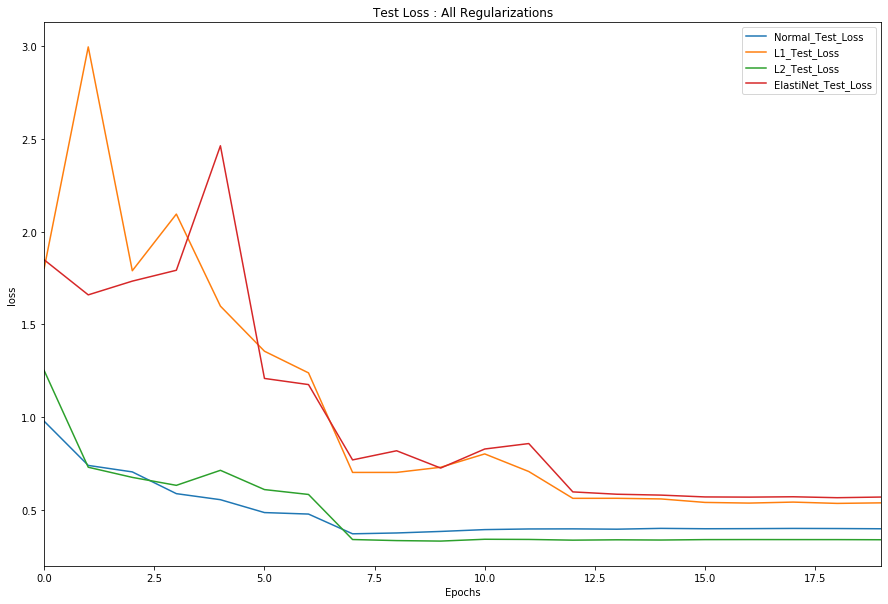

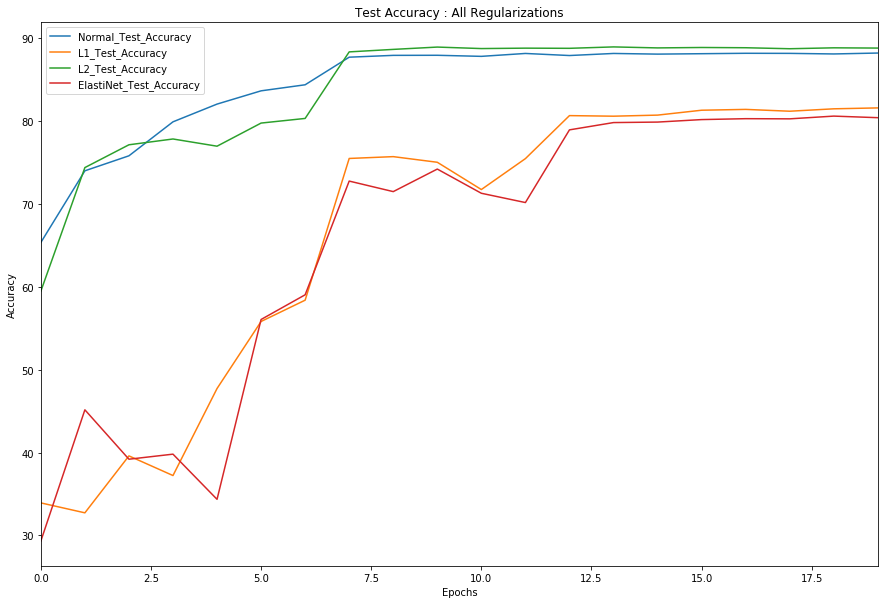

In [16]:
import pandas as pd
Testing_all_loss = pd.DataFrame({'Normal_Test_Loss' : np.array(test_losses).reshape(-1),
                                 'L1_Test_Loss' : np.array(test_losses_L1).reshape(-1),
                                 'L2_Test_Loss' : np.array(test_losses_L2).reshape(-1),
                                 'ElastiNet_Test_Loss' : np.array(test_losses_L1_L2).reshape(-1)
                                 })

Testing_all_accuracy = pd.DataFrame({'Normal_Test_Accuracy' : np.array(test_acc).reshape(-1),
                                     'L1_Test_Accuracy' : np.array(test_acc_L1).reshape(-1),
                                     'L2_Test_Accuracy' : np.array(test_acc_L2).reshape(-1),
                                     'ElastiNet_Test_Accuracy' : np.array(test_acc_L1_L2).reshape(-1)
                                     })

fig1 = Testing_all_loss.plot(figsize=(15,10),kind = 'line', title = "Test Loss : All Regularizations")
fig1.set_xlabel("Epochs")
fig1.set_ylabel("loss")
fig2 = Testing_all_accuracy.plot(figsize=(15,10),kind = 'line',title = "Test Accuracy : All Regularizations")
fig2.set_xlabel("Epochs")
fig2.set_ylabel("Accuracy")

fig1
fig2